# Unidad 2 - 04 Laboratorio de descenso del gradiente

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use(['ggplot'])

## 1. Creación del conjunto de datos

En esta oportunidad trabajaremos sobre un conjunto de datos generado de manera aleatoria, en lugar de usar algún ejemplo de la literatura.



In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

Ejercicio: Analizar cómo fue creado este dataset y cambiar los parámetros involucrados.

A continuación visualizaremos los datos.


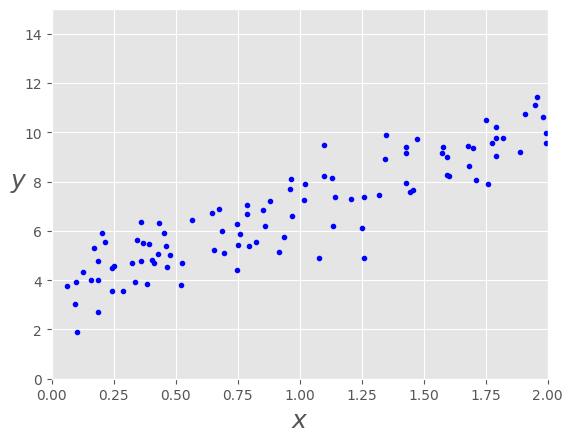

In [ ]:

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])


Ejercicio: buscar alguna alternativa para visualizar los datos.

## 2. Forma analítica del método de regresión lineal.

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.55132173]
 [3.36106745]]


In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.55132173],
       [10.27345663]])

(0.0, 2.0, 0.0, 15.0)

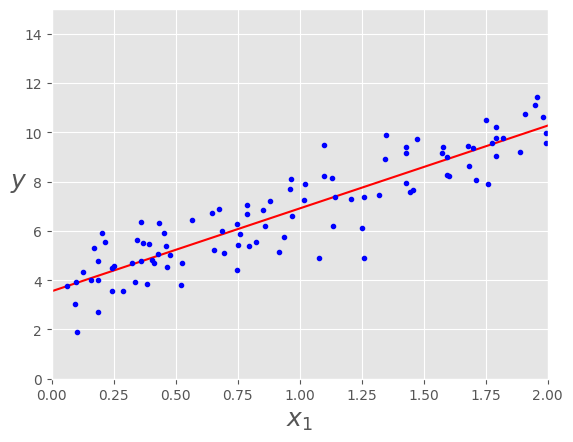

In [ ]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

Ejercicio: Analizar el código y los resultados obtenidos.

## 3. Descenso del gradiente

Abordamos el mismo problema de ajustar los datos según una recta, pero en este caso, en lugar de acudir a la fórmula cerrada que nos dan las ecuaciones normales para recuperar el valor de $\theta$ óptimo, aplicaremos descenso del gradiente a nuestro problema de minimización.

Ejercicio: Escribir el problema como problema de optimización, explicitando función objetivo y calcular su gradiente.

A continuación armamos la función objetivo que utilizaremos para evaluar cada iteración del algoritmo.

In [ ]:

def  cal_cost(theta,X,y):
    '''

    Calcula el costo para X e y dados. Lo siguiente muestra un ejemplo de un X unidimensional.
    theta = Vector de thetas
    X     = Fila de X's np.zeros((2,j))
    y     = y's reales np.zeros((2,1))

    dond:
        j es la cantidad de características (features)
    '''

    m = len(y)

    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


Ahora estamos en condiciones de armar el algoritmo del descenso del gradiente de para aplicar a nuestro problema de mínimo.

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matriz de X con columna de unos
    y    = Vector de Y
    theta= Vector de thetas
    learning_rate= longitud del paso (tasa de aprendizaje)
    iterations = cantidad de iteraciones

    Devuelve el vector theta final y el vector de evolución del costo a lo largo de las iteraciones
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):

        prediction = np.dot(X,theta)

        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history, theta_history

Probemos nuestro algoritmo con algún valor fijo para la tasa de aprendizaje, alguna cantidad de iteraciones y algún valor inicial del vector $\theta$.

In [ ]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)




In [ ]:
T=[theta_history[100*k] for k in range(10)]
print(T)

[array([0.75053545, 1.45193369]), array([2.74999505, 3.53119297]), array([3.06427845, 3.72407868]), array([3.16187771, 3.69562296]), array([3.22398159, 3.64801511]), array([3.27411523, 3.60477622]), array([3.31631574, 3.56776198]), array([3.35206064, 3.53633392]), array([3.38236485, 3.50968018]), array([3.40805984, 3.4870793 ])]


In [ ]:
L=[cost_history[100*k] for k in range(10)]
print(L)

[117107.41072102405, 6535.267395145312, 4766.170426910157, 4656.576746234429, 4595.163441894643, 4551.269101180172, 4519.71432424901, 4497.027480754006, 4480.7163478940065, 4468.989151507414]


## Grafiquemos la evolución del costo a lo largo de las iteraciones

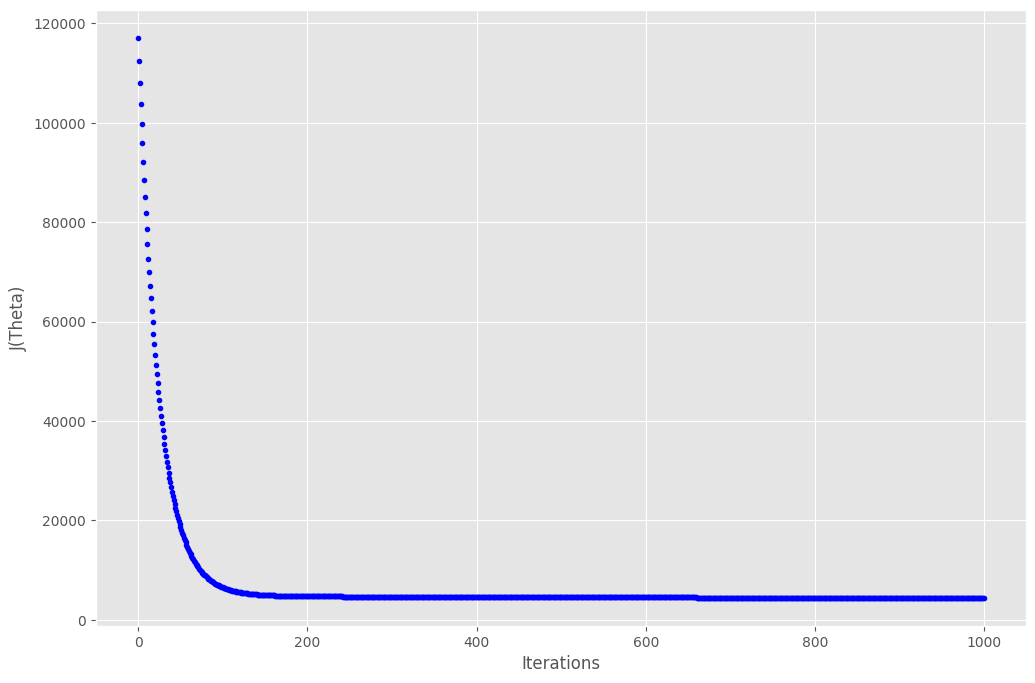

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

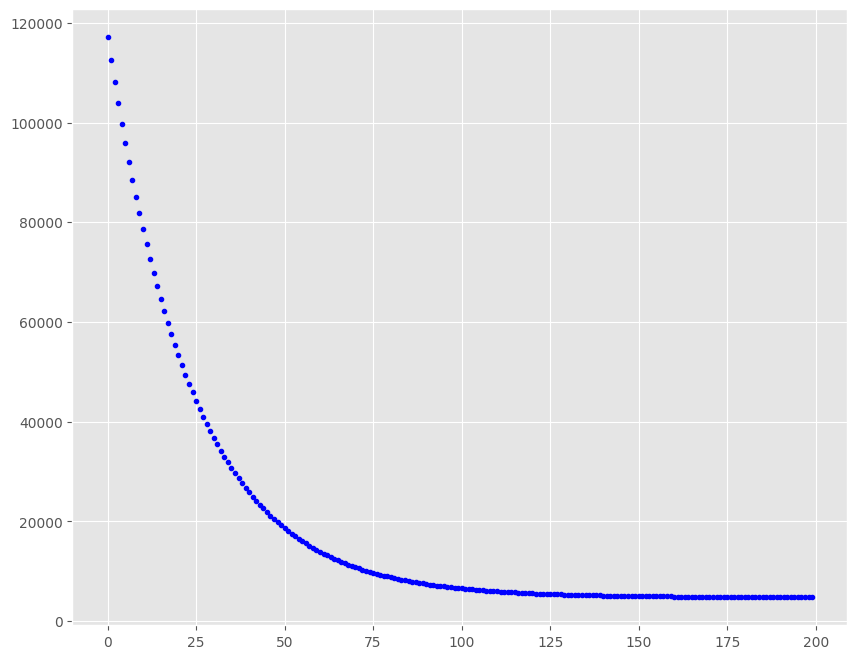

In [ ]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

## Visualización del algoritmo

Construimos una función que permita luego visulizar la evolución del algoritmo desde distintos puntos de vista.

In [ ]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = cantidad de iteraciones
     lr = tasa de aprendizaje
     ax = Eje para graficar el descenso del gradiente
     ax1 = Eje para graficar la evolución del costo

     """
    #  X = range(101)
    #  y = np.arange(-40, 40, 0.5)
     _ = ax.plot(X, y, 'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X, pred, 'r-', alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

Graficamos para distintos juegos de cantidad iteraciones y tasas de aprendizaje

NameError: ignored

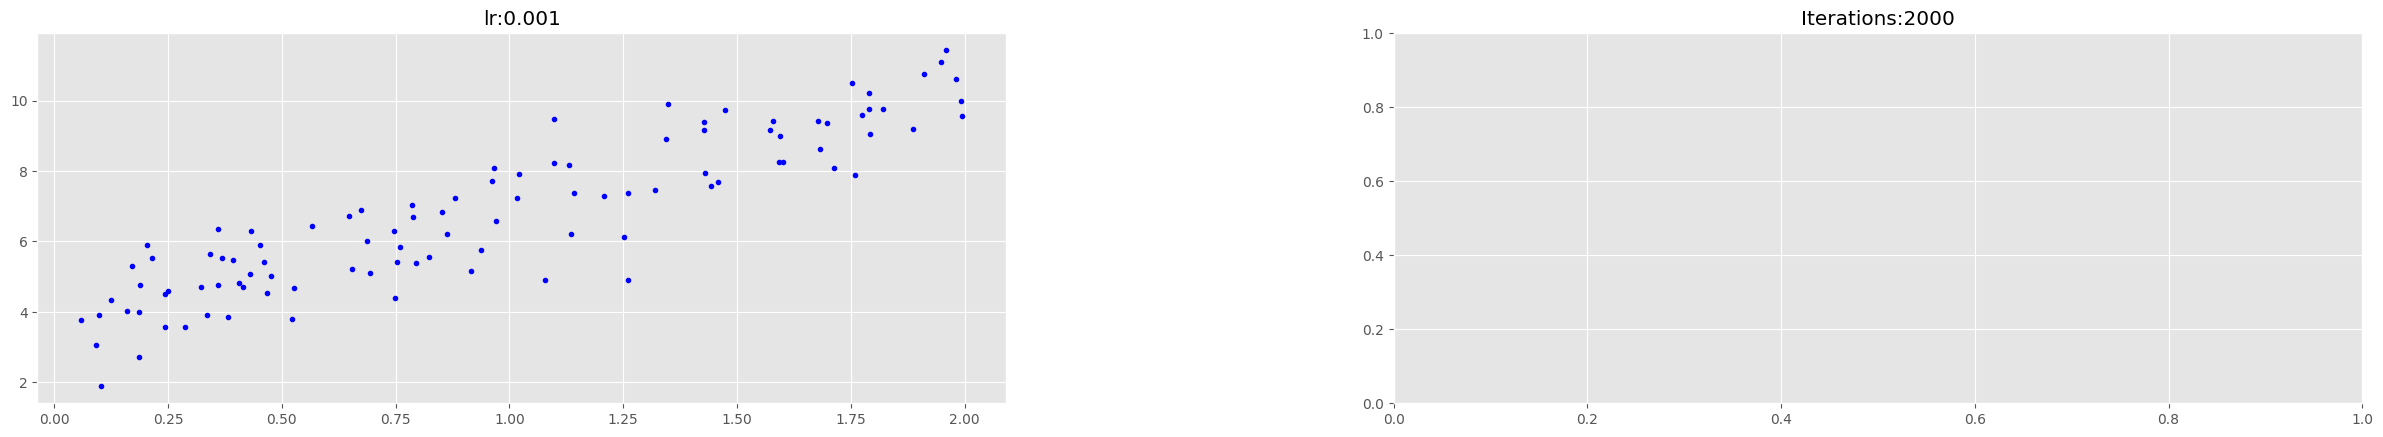

In [ ]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

Si queremos podemos visualizar de manera individual.

In [ ]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

Ejercicio: repita el proceso que hicimos hasta acá para datasets que hemos abordado con el método de regresión lineal.
Analice resultados.